In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/Face Mask/data")))

['without_mask', 'with_mask']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [ ]:
train_data_dir = '/content/drive/My Drive/Face Mask/data'
img_height = 256
img_width = 256
batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 5789 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.


In [ ]:
history = classifier.fit(train_generator, validation_data = validation_generator,batch_size = batch_size,epochs=15, verbose=1)

Epoch 1/15
181/181 [==============================] - 3346s 18s/step - loss: 0.3387 - accuracy: 0.8473 - precision: 0.8630 - recall: 0.8456 - auc: 0.9292 - val_loss: 0.2415 - val_accuracy: 0.9080 - val_precision: 0.8950 - val_recall: 0.9359 - val_auc: 0.9654
Epoch 2/15
181/181 [==============================] - 135s 749ms/step - loss: 0.2504 - accuracy: 0.8960 - precision: 0.9062 - recall: 0.8962 - auc: 0.9617 - val_loss: 0.1988 - val_accuracy: 0.9246 - val_precision: 0.9327 - val_recall: 0.9242 - val_auc: 0.9751
Epoch 3/15
181/181 [==============================] - 135s 744ms/step - loss: 0.2219 - accuracy: 0.9084 - precision: 0.9192 - recall: 0.9066 - auc: 0.9699 - val_loss: 0.2204 - val_accuracy: 0.9302 - val_precision: 0.9192 - val_recall: 0.9516 - val_auc: 0.9729
Epoch 4/15
181/181 [==============================] - 135s 748ms/step - loss: 0.2033 - accuracy: 0.9207 - precision: 0.9294 - recall: 0.9200 - auc: 0.9753 - val_loss: 0.2005 - val_accuracy: 0.9232 - val_precision: 0.9303 

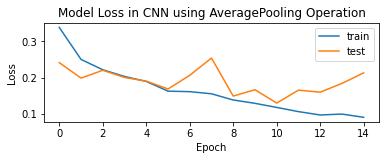

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss in CNN using AveragePooling Operation')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
Xception_train_loss = history.history['loss']
Xception_test_loss = history.history['val_loss']
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/Loss_AveragePooling.png')
pyplot.legend()
pyplot.show()

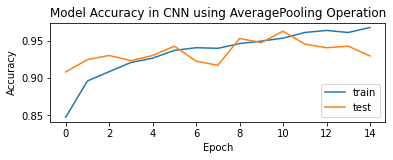

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Accuracy in CNN using AveragePooling Operation')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
Xception_train_accuracy = history.history['accuracy']
Xception_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/Acc_AveragePooling.png')
pyplot.legend()
pyplot.show()

In [ ]:
score = classifier.evaluate(validation_generator)
print(" Total: ", len(validation_generator.filenames))
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 25s 544ms/step - loss: 0.2033 - accuracy: 0.9295 - precision: 0.9356 - recall: 0.9307 - auc: 0.9783
 Total:  1446

 Loss:  0.20330646634101868 
 Accuracy:  0.9294605851173401 
 Precision:  0.9356110095977783 
 Recall:  0.9307189583778381 
 F1-Score:  0.9331585724299516 
 AUC:  0.9783219695091248


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

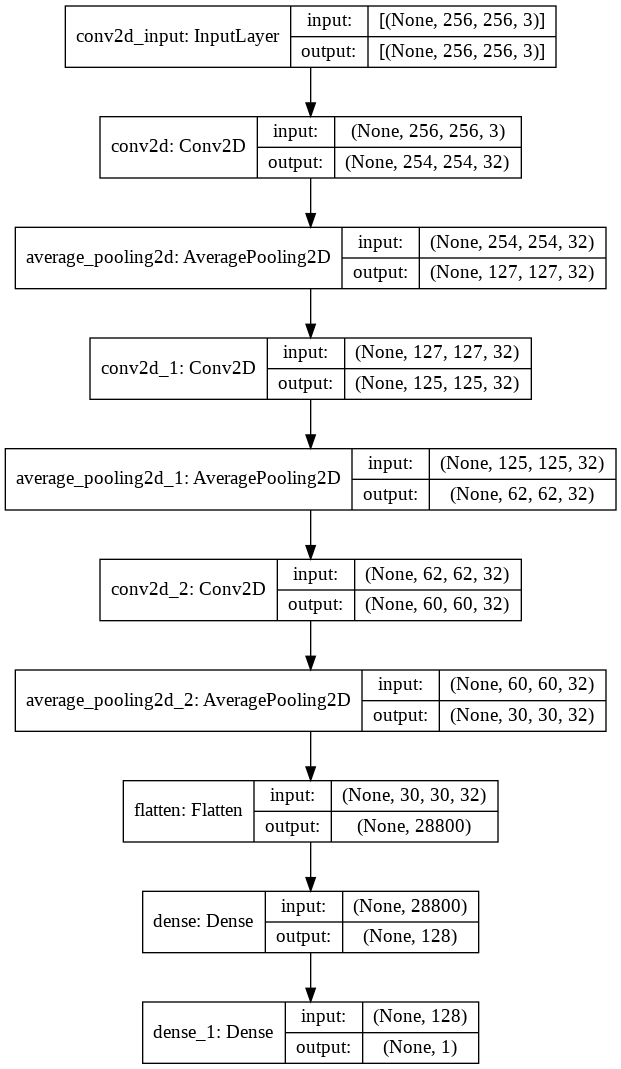

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 15
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.338729 	   0.847297 	   0.241468 	   0.908022
       2   0.250410 	   0.896010 	   0.198804 	   0.924620
       3   0.221862 	   0.908447 	   0.220418 	   0.930152
       4   0.203303 	   0.920712 	   0.200542 	   0.923236
       5   0.189594 	   0.926585 	   0.190396 	   0.930152
       6   0.162698 	   0.936949 	   0.168633 	   0.942600
       7   0.161325 	   0.940577 	   0.206440 	   0.922545
       8   0.155415 	   0.939713 	   0.254232 	   0.917012
       9   0.138325 	   0.946105 	   0.149101 	   0.952974
      10   0.129060 	   0.949387 	   0.166621 	   0.947441
      11   0.117768 	   0.953360 	   0.129866 	   0.962656
      12   0.106161 	   0.960960 	   0.165388 	   0.945367
      13   0.096872 	   0.963724 	   0.159893 	   0.940526
      14   0.099368 	   0.960960 	   0.184075 	   0.942600
      15   0.090438 	   0.967697 	   0.213232 	   0.929461


In [ ]:
classifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = classifier.fit(train_generator, validation_data = validation_generator, epochs=1, batch_size=batch_size, verbose=1)

181/181 [==============================] - 154s 846ms/step - loss: 0.0862 - true_positives: 2967.0000 - true_negatives: 2645.0000 - false_positives: 81.0000 - false_negatives: 96.0000 - val_loss: 0.1642 - val_true_positives: 743.0000 - val_true_negatives: 639.0000 - val_false_positives: 42.0000 - val_false_negatives: 22.0000


In [ ]:
score = classifier.evaluate(train_generator)
print(" Total: ", len(train_generator.filenames))
# f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print('\t','\t','\t','******In Train Data***','\n')
print("\n","Loss: ", score[0],"\n", "TP: ", score[1],"\n", "TN: ",score[2], "\n","FP: ",score[3],"\n","FN: ",score[4])

181/181 [==============================] - 107s 590ms/step - loss: 0.0738 - true_positives: 3028.0000 - true_negatives: 2598.0000 - false_positives: 128.0000 - false_negatives: 35.0000
 Total:  5789
	 	 	 ******In Train Data*** 


 Loss:  0.07384783029556274 
 TP:  3028.0 
 TN:  2598.0 
 FP:  128.0 
 FN:  35.0


In [ ]:
score = classifier.evaluate(validation_generator)
print(" Total: ", len(validation_generator.filenames))
# f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print('\t','\t','\t','******In Test Data***','\n')
print("\n","Loss: ", score[0],"\n", "TP: ", score[1],"\n", "TN: ",score[2], "\n","FP: ",score[3],"\n","FN: ",score[4])

46/46 [==============================] - 25s 544ms/step - loss: 0.1569 - true_positives: 741.0000 - true_negatives: 638.0000 - false_positives: 43.0000 - false_negatives: 24.0000
 Total:  1446
	 	 	 ******In Test Data*** 


 Loss:  0.15694548189640045 
 TP:  741.0 
 TN:  638.0 
 FP:  43.0 
 FN:  24.0


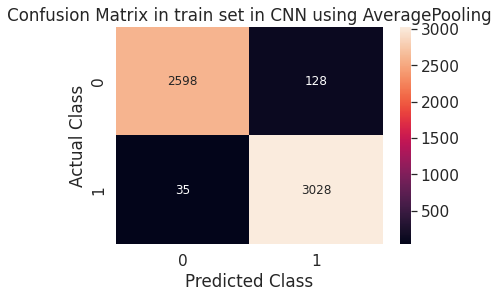

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[2598,128],
         [35,3028]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in train set in CNN using AveragePooling')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/ConfusionMatrix_CNN_AveragePooling_train.png')
pyplot.show()

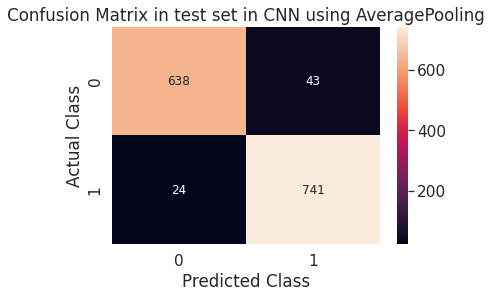

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[638,43],
         [24,741]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in test set in CNN using AveragePooling')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/ConfusionMatrix_CNN_AveragePooling_test.png')
pyplot.show()

with Mask


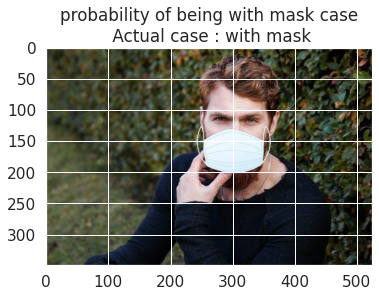

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
img=mpimg.imread('/content/drive/My Drive/Face Mask/data/with_mask/with_mask_1.jpg')
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Face Mask/data/with_mask/with_mask_1.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_generator.class_indices

if result[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
dic = {0:'with mask', 1:'without mask'}

plt.title(out+"\n Actual case : "+ dic.get(result[0][0])) 

imgplot = plt.imshow(img)

Predicted Class:  1.0 

without Mask


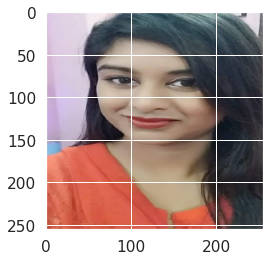

In [ ]:
from keras.models import load_model
classifier.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('without_mask_priyata.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print('Predicted Class: ',classes[0][0],'\n')
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)

Predicted Class:  0.0 

with Mask


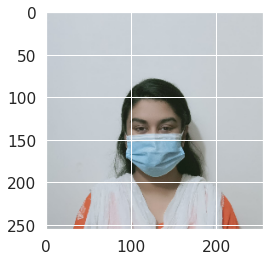

In [ ]:
from keras.models import load_model
classifier.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('with_mask_priyata.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print('Predicted Class: ',classes[0][0],'\n')
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)

Predicted Class:  1.0 

without Mask


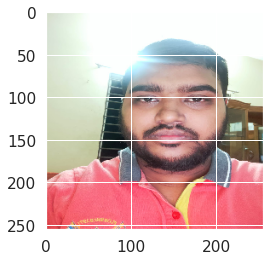

In [ ]:
from keras.models import load_model
classifier.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('without_mask_shadhin.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print('Predicted Class: ',classes[0][0],'\n')
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)

Predicted Class:  0.0 

with Mask


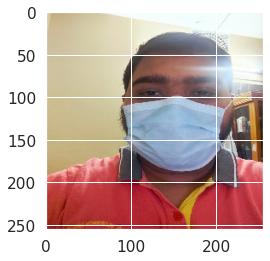

In [ ]:
from keras.models import load_model
classifier.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('with_mask_shadhin.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print('Predicted Class: ',classes[0][0],'\n')
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)

Predicted Class:  1.0 

without Mask


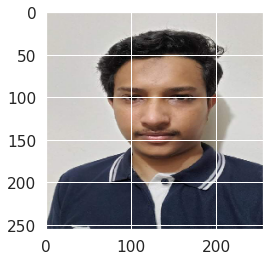

In [ ]:
from keras.models import load_model
classifier.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('without_mask_daiyan.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print('Predicted Class: ',classes[0][0],'\n')
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)

Predicted Class:  0.0 

with Mask


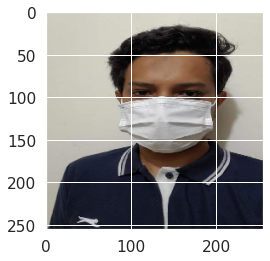

In [ ]:
from keras.models import load_model
classifier.save('model.h5')
model = load_model('model.h5')
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('with_mask_daiyan.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print('Predicted Class: ',classes[0][0],'\n')
if classes[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
imgplot = plt.imshow(img)